<a href="https://colab.research.google.com/github/Ravindra3609/GooglePlayStore_ML/blob/main/ML_Algo_for_google_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**
* The google play store is one of the largest and most popular Android app stores. It has an enormous amount of data that can be used to make an optimal model. We have used a raw data set of Google Play Store from the Kaggle website.
* This data set contains 13 different features that can be used for predicting whether an app will be successful or not using different features. This data set is scraped from the Google Play Store.
* This journal talks about different classifier models that we used for prediction purposes and finding which one gives the highest accuracy. This journal also gives detailed information on feature extraction and the complete
Data visualization done on this data set

**IT FOCUSES ON :**

* Exploratory Data Analysis
* Machine Learning models to predict the    rating of an app
* Understanding Data
* Data Cleaning
* Data Visualization
* Machine Learning Models Implemetation


**IMPORTING LIBRARIES IN PYTHON ACCORDING TO THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**By using some HTML & CSS Content We can place the content in order** 

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

**READ THE CSV FILE DATA BY USING PANDAS**

In [ ]:
google_data = pd.read_csv('/content/googleplaystore.csv.zip')
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
google_data.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


**DATA UNDERSTANDING**

In [ ]:
google_data.shape

(10841, 13)

**INFORMATION OF THAT PARTICULAR DATA**

In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**NUMBER OF NaN's IN EVERY COLUMN**

In [ ]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**UNIQUE CATEGORIES IN DATASET**

In [ ]:
google_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

**App Ratings which is greater than 7**

In [ ]:
google_data[google_data.Rating > 7]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Total number of apps per category with representation of barchart and piechart.**

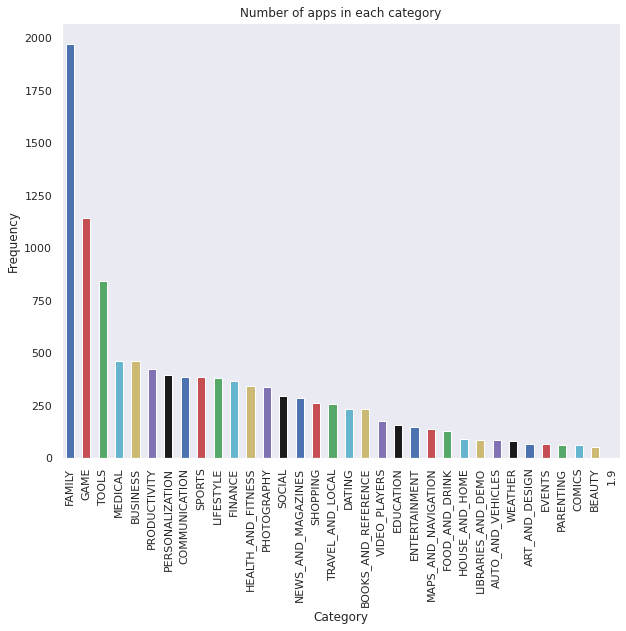

In [ ]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(google_data))) # a way to represent different colours 
google_data.Category.value_counts().plot(kind = 'bar', color = my_colors, figsize = (10,8), title = 'Number of apps in each category');
plt.xlabel('Category')
plt.ylabel('Frequency');

**PIE CHART REPRESENTATION**

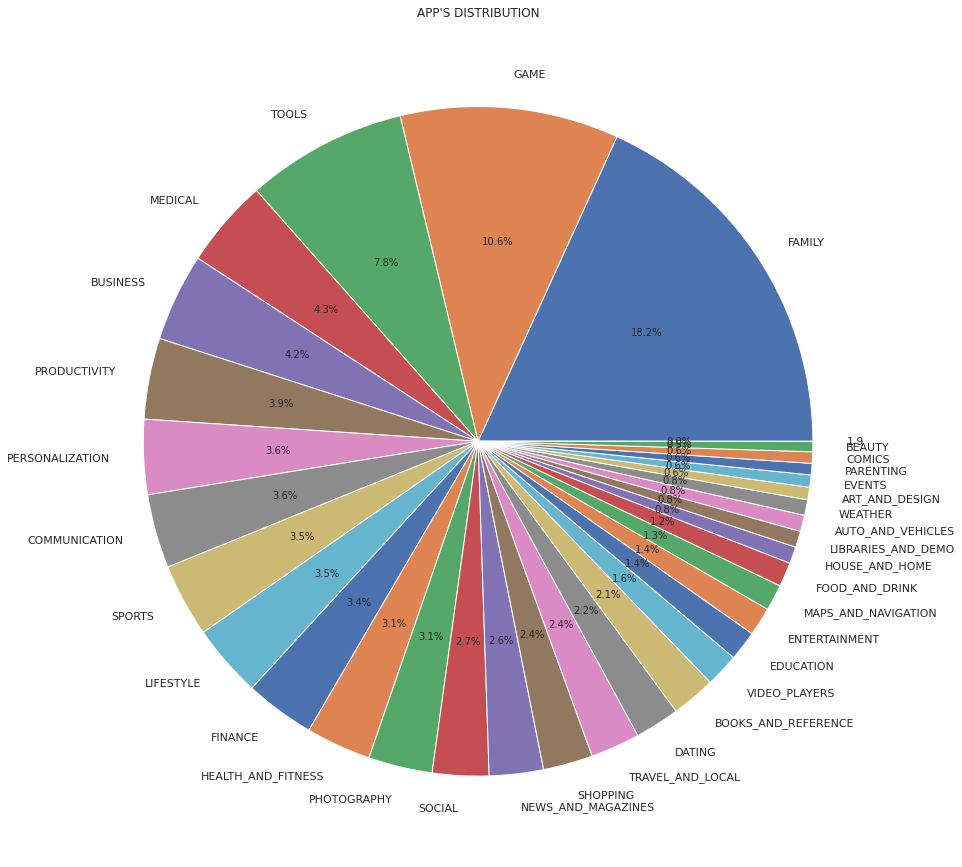

In [ ]:
google_data['Category'].value_counts().plot.pie(y = google_data['Category'],figsize = (15,16),label = ' ',autopct = '%1.1f%%',title = "APP'S DISTRIBUTION",);

**RATING**

In [ ]:
google_data['Rating'] = google_data['Rating'].apply(lambda x: str(x).replace('nan', 'NaN') if 'nan' in str(x) else str(x))  # Replace nan with NaN
google_data['Rating'] = google_data['Rating'].apply(lambda x: float(x)) # Rewrite column in a float format

google_data['Rating'] = google_data['Rating'].fillna(google_data['Rating'].median()) # Replace null numbers with median numbers

google_data.Rating.isnull().sum() # Now we don't have any null numbers in the column

0

In [ ]:
google_data.describe()

,Rating
count,10841.000000
mean,4.207841
std,0.500893
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,19.000000


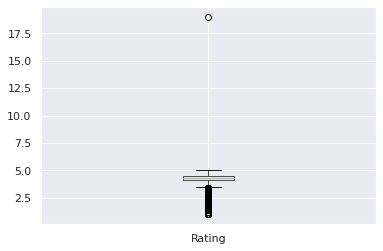

In [ ]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de66ef450>]],
      dtype=object)

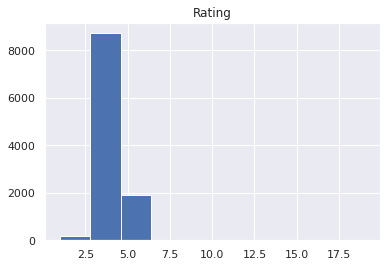

In [ ]:
google_data.hist()

In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count the number of missing value in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
#fill the null values with appropriate value using aggregate function such as mean , meadian and mode 
def impute_median(series):
  return series.fillna(series.median())

In [ ]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [ ]:
#count the number of null values in each column 
google_data .isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
#mode of categorial values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
#fill the missing categorial values with modes
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#mode of categorial values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
#fill the missing categorial values with modes
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# let's convert price, review and rating into Numerical vaules
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
#google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [ ]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
#google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [ ]:
google_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
google_data.describe()

,Rating,Reviews
count,10841.000000,1.084000e+04
mean,4.207841,4.441529e+05
std,0.500893,2.927761e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,19.000000,7.815831e+07


***DATA VISUALIZATION BY NUMBER OF DOWNLOADS AN APP CAN RECEIVE USING THE GOOGLE APP STORE***

In [ ]:
#Data VISUALIZATION 
grp = google_data.groupby('Installs')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Installs
0              4.300000
1              4.331343
10             4.358031
100            4.327260
1000           4.116648
10000          4.050569
100000         4.113345
1000000        4.220963
10000000       4.313419
100000000      4.411491
1000000000     4.258621
5              4.334146
50             4.332683
500            4.224848
5000           4.050524
50000          4.057411
500000         4.168460
5000000        4.243218
50000000       4.351211
500000000      4.350000
Free          19.000000
Name: Rating, dtype: float64
Installs
0             1.4913.991.992.99154.99000003.99200.0030.99394...
1             002.990.990000.991.491.4900.99002.990.991.9900...
10            00000000005.9900000000000000000000002.992.492....
100           2.993.997.99000000000000000000000000.990.992.9...
1000          06.9900000000000000003.995.990000000003.992.99...
10000         00000000000000000000000000000000003.9900003.99...
100000        0000000000000000000000000000000000000000000000...
1

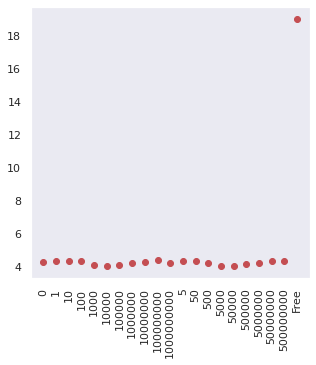

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

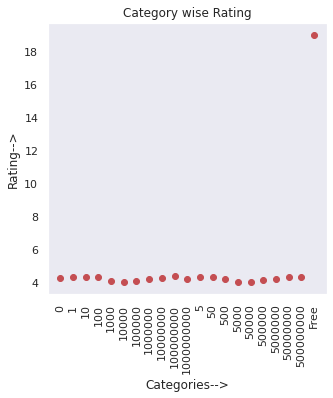

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

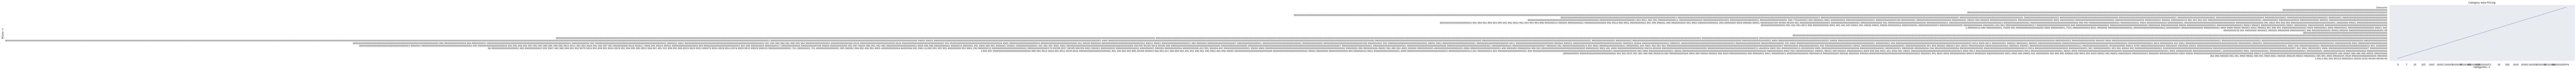

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=180)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

**BARCHART**

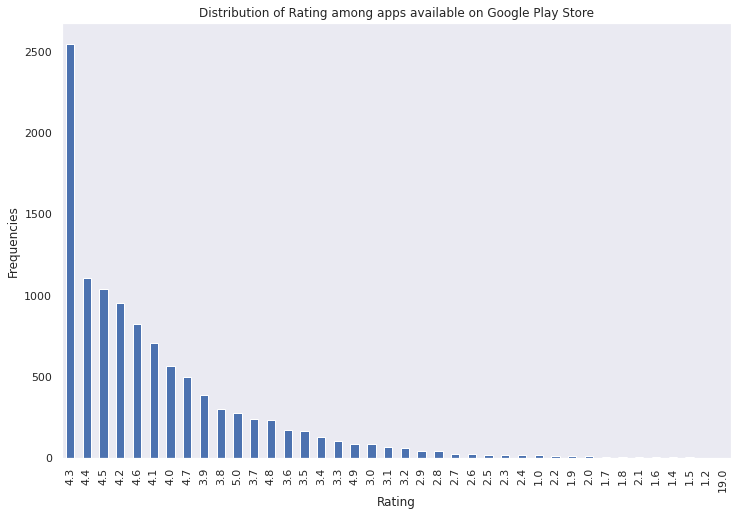

In [ ]:
google_data.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (12, 8), title = 'Distribution of Rating among apps available on Google Play Store'); # Historgram of frequencies 
plt.xlabel('Rating')
plt.ylabel('Frequencies');

**REVIEWS**

In [ ]:
google_data.Installs.isnull().sum() 

0

In [ ]:
google_data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [ ]:
# Clean Size column
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('M', 'e+6') if 'M' in str(x) else str(x)) # Convert Megabytes to bytes
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('k', 'e+3') if 'k' in str(x) else str(x)) # Convert kilobytes to bytes

# Function converts number to float, if possible
def is_convertable(number):
    try:
        float(number)
        return True
    
    except:
        return False
    
    
size_column = google_data.Size.apply(lambda x: is_convertable(x))    
size_column.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [ ]:
google_data.Size = google_data.Size.replace(np.nan, 'Varies with device')
google_data.Size.isnull().sum()

0

In [ ]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True) # Fill NaN entries with mode value in the column. 'Free' is the mode in this case 
google_data.Type.isnull().sum()

0

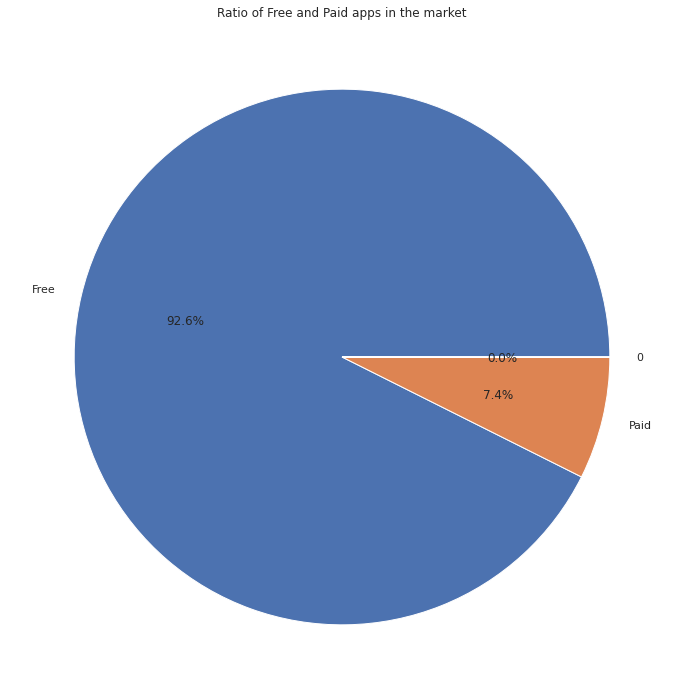

In [ ]:
# The Free vs Paid apps
google_data.Type.value_counts().plot.pie(y = google_data.Type, figsize = (12, 14), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


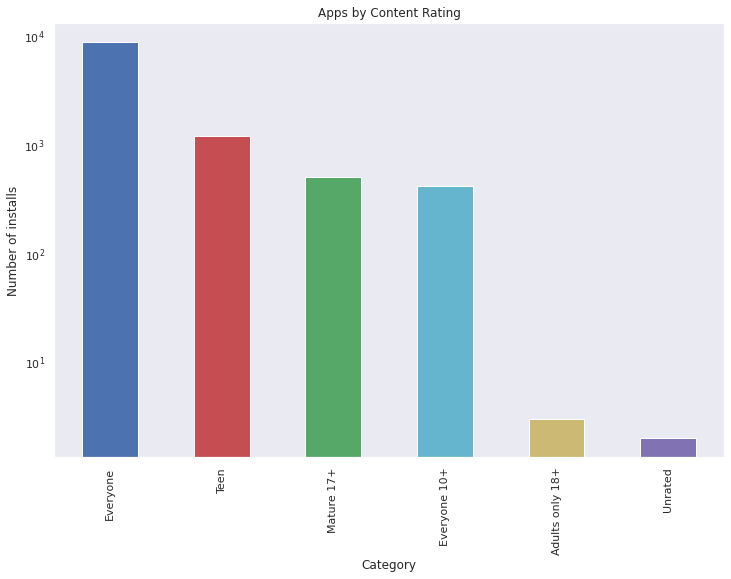

In [ ]:
print(google_data['Content Rating'].unique())
google_data['Content Rating'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating', color = my_colors, figsize = (12,8))
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.yscale('log');

In [ ]:
# Show how data is distributed. We can see that majority of genre is represented in format Category;Subcategory
google_data.Genres.unique()
google_data.Genres.isnull().sum()

0

In [ ]:
# Clean Current Ver column
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: 'Varies with device' if x == 'Varies with device' else re.findall('^[0-9]\.[0-9]|[\d]|\W*', str(x))[0]) # Leaves only numbered versions
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: str(x).strip('0') if x == '0' else str(x)) # I have checked that there are now instances of version 0
google_data['Current Ver'] = google_data['Current Ver'].apply(lambda x: str(x).strip('0.3') if x == '0.3' else str(x)) # Neither there is an instance of 0.3

google_data['Current Ver'].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4'],
      dtype=object)

In [ ]:
google_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
# Rewrite Android column in numerical format
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).replace(' and up', '') if ' and up' in str(x) else str(x))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip('W'))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).split('-')[-1])

google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip()) # Remove extra whitespace before the end of a string

google_data['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '7.1.1', '2.0', '3.2', '7.1', '8.0', '3.1',
       '2.0.1', 'nan', '1.0'], dtype=object)

In [ ]:
print('Number of \'Varies with Device\' in Android Ver column: ', google_data[google_data['Android Ver'] == 'Varies with device'].count()[0] )
print('Number of \'nan\' in Android Ver column', google_data[google_data['Android Ver'] == 'nan'].count()[0])

Number of 'Varies with Device' in Android Ver column:  1362
Number of 'nan' in Android Ver column 3


In [ ]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


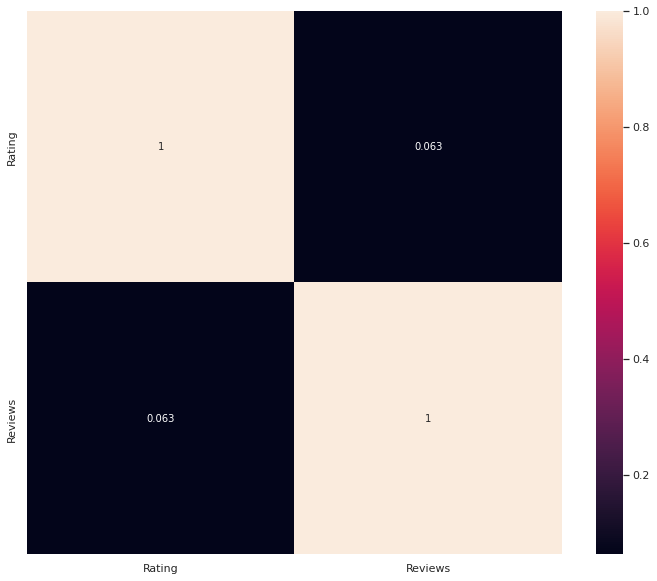

In [ ]:
# Correlation map
plt.figure(figsize = (12, 10)); # Adding command before the heatmap allows to control the size of a plot
sns.heatmap(google_data.corr(), annot = True);

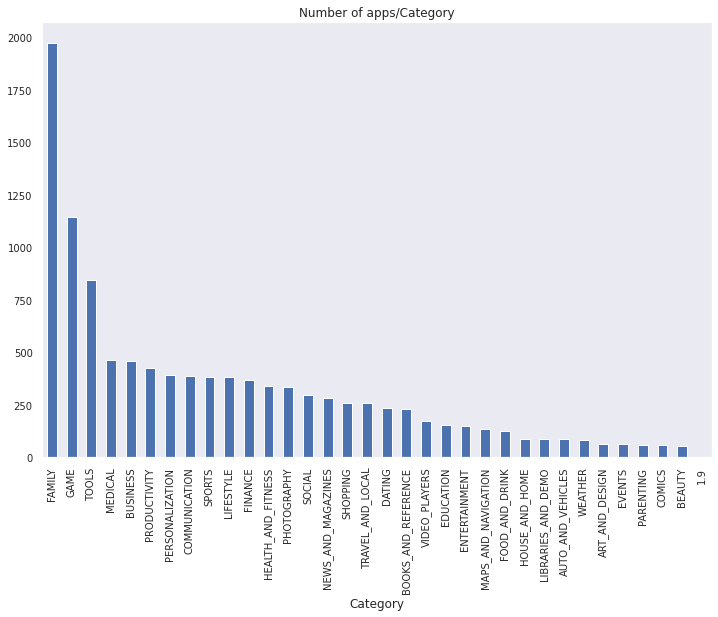

In [ ]:
# Total Number of apps per category

google_data.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of apps/Category', fontsize=10, figsize = (12, 8));

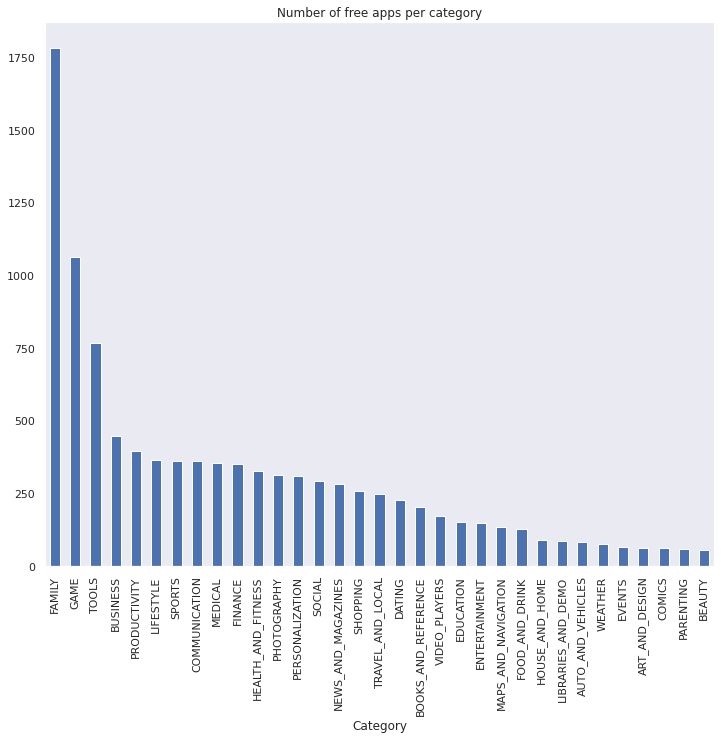

In [ ]:
free_apps = google_data[google_data.Type == 'Free']
free_apps.groupby('Category').count()['App'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12,10), title = 'Number of free apps per category'); 

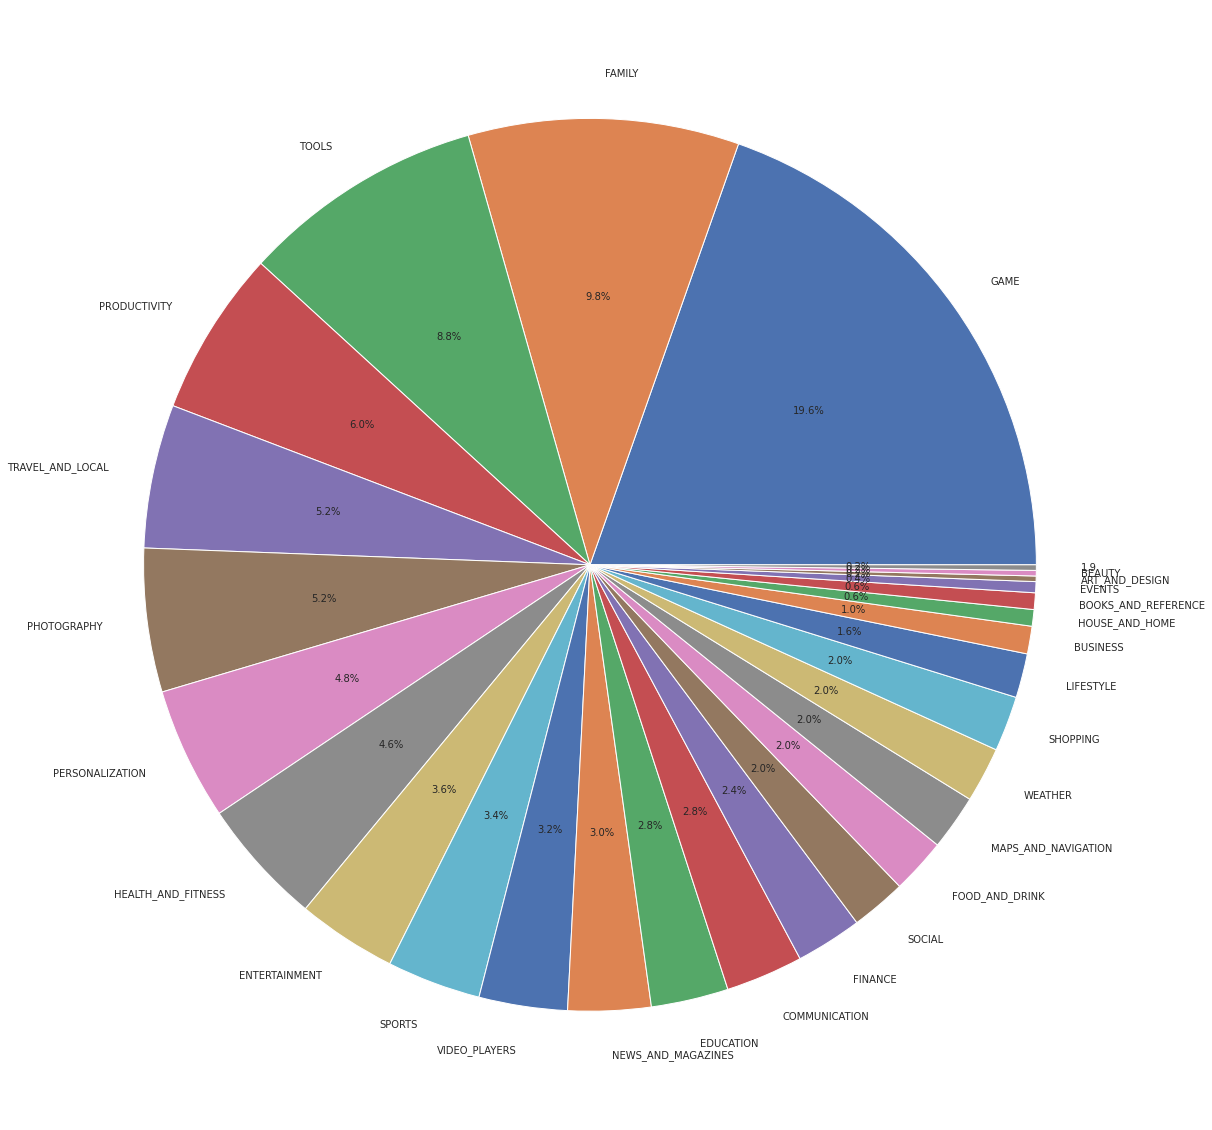

In [ ]:
top_five_hundred = google_data.sort_values('Installs', ascending= False).head(500) # Top 500 apps by Category
# labels = df3['Content Rating'].value_counts(sort = True).index

top_five_hundred.Category.value_counts().plot.pie(y = top_five_hundred.Category,fontsize = 10, figsize = (20,32), autopct='%1.1f%%', label = '');

In [ ]:
# paid_apps = google_data[google_data.Price > 0]
google_data.Price.describe()

count     9660
unique      93
top          0
freq      8903
Name: Price, dtype: object

In [ ]:
google_data.Size.describe()

count      8433
unique      461
top       11e+6
freq        182
Name: Size, dtype: object

In [ ]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Installs, y = google_data.Rating, edgecolor = 'white');

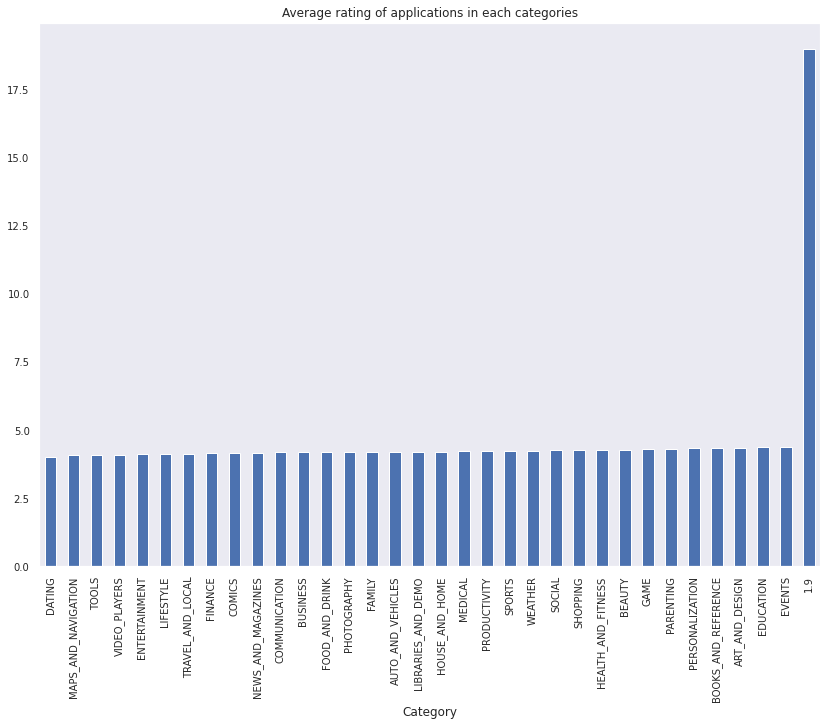

In [ ]:
google_data.groupby('Category').mean().sort_values(by = 'Rating', ascending = 'False')['Rating'].plot(kind = 'bar', title = 'Average rating of applications in each categories', fontsize = 10, figsize = (14,10));